In [176]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns


In [177]:
df=pd.read_csv("Mortgage_default - hmeq.csv")

In [178]:
df.isnull().sum()

BAD           0
MORTDUE     518
VALUE       112
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [179]:
# data cleaning

# getting rid of all rows with no MORTDUE value
df.dropna(subset=["MORTDUE"], inplace=True)

# changing null jobs to Other        
df.JOB = df.JOB.fillna(value="Other")

# changing null YOJ (years at present job) to meadian value
df.YOJ.fillna(df.YOJ.median(), inplace=True)

# changing null DEROG (number of derogatory reports) and DELINQ and NINQ to 0 
df.DEROG.fillna(0, inplace=True)
df.DELINQ.fillna(0, inplace=True)
df.NINQ.fillna(0,inplace=True)

# changing CLAGE to median
df.CLAGE.fillna(df.CLAGE.median(), inplace=True)

# changing CLNO to median
df.CLNO.fillna(df.CLNO.median(), inplace=True)

# changing DEBTINC to mean
df.DEBTINC.fillna(df.DEBTINC.mean(), inplace=True)
df.isnull().sum()

BAD         0
MORTDUE     0
VALUE      85
JOB         0
YOJ         0
DEROG       0
DELINQ      0
CLAGE       0
NINQ        0
CLNO        0
DEBTINC     0
dtype: int64

In [180]:
# getting dummy variables for JOB column
df = pd.get_dummies(df, columns=["JOB"], dtype=int)
df

,BAD,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.302520,0,0,1,0,0,0
1,1,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.302520,0,0,1,0,0,0
2,1,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.302520,0,0,1,0,0,0
4,0,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.302520,0,1,0,0,0,0
5,1,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,0,0,1,0,0,0
5956,0,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,0,0,1,0,0,0
5957,0,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,0,0,1,0,0,0
5958,0,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,0,0,1,0,0,0


In [181]:
# building two models

# --- one without processing the data
# --- one with data prepared, outliers removed, numerical values normalized or transformed
# --- also, different 

In [182]:
df.corr()["BAD"].sort_values()

CLAGE         -0.163278
JOB_Office    -0.071027
YOJ           -0.056545
VALUE         -0.054871
JOB_ProfExe   -0.050603
MORTDUE       -0.048219
CLNO          -0.013143
JOB_Mgr        0.033498
JOB_Other      0.039048
JOB_Self       0.049358
JOB_Sales      0.059572
DEBTINC        0.130268
NINQ           0.164286
DEROG          0.294820
DELINQ         0.340468
BAD            1.000000
Name: BAD, dtype: float64

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [184]:
# the most basic model 


import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

# X_train, X_test, y_train, y_test = train_test_split(df[["DELINQ","DEROG","NINQ","CLAGE"]], df["BAD"], test_size=0.2, random_state=1)


# model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# predictions = model.predict(sm.add_constant(X_test))


# predictions = [1 if i > 0.5 else 0 for i in predictions]
# confusion_matrix = confusion_matrix(y_test, predictions)

# print(confusion_matrix)
# print(classification_report(y_test, predictions))



# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()



In [185]:
# results of forward stepwise regression model building

# 1 
# independent variables:
# DELINQ 
# matrix:
# [872  17]
#  [164  36]
# precision:
# 0.68

# 2
# independent variables:
# DELINQ, DEROG
# matrix:
# [864  25]
#  [144  56]
# precision:
# 0.69

# 3
# independent variables:
# DELINQ, DEROG, NINQ
# matrix:
# [860  29]
#  [142  58]
# precision/ recall/ f-1 score:
# 0.67      0.29      0.40

# 4
# independent variables:
# DELINQ, DEROG, NINQ, CLAGE
# matrix:
# [871  18]
#  [136  64]
# precision/ recall/ f-1 score:
# 0.78      0.32      0.45 

# 5
# independent variables:
# DELINQ, DEROG, NINQ, CLAGE, DEBTINC
# matrix:
# [870  19]
#  [136  64]
# precision/ recall/ f-1 score:
# 0.77      0.32      0.45

# the next iteration also yields worse resulst. The best model is with useing 4 values


In [186]:
# For value to get LTV of 45% according values will be inserted
df['VALUEorg'] = df.VALUE
df["VALUE"] = df.apply(lambda x: x["MORTDUE"] * 0.9 if pd.isnull(x["VALUE"]) else x["VALUE"], axis=1)
df.isnull().sum()

BAD             0
MORTDUE         0
VALUE           0
YOJ             0
DEROG           0
DELINQ          0
CLAGE           0
NINQ            0
CLNO            0
DEBTINC         0
JOB_Mgr         0
JOB_Office      0
JOB_Other       0
JOB_ProfExe     0
JOB_Sales       0
JOB_Self        0
VALUEorg       85
dtype: int64

In [187]:
# X_train, X_test, y_train, y_test = train_test_split(df[["DELINQ","DEROG","NINQ","CLAGE",'DEBTINC','JOB_Office','JOB_Sales','YOJ','VALUE','JOB_ProfExe','JOB_Self']], df["BAD"], test_size=0.2, random_state=1)
# # ["DELINQ","DEROG","NINQ","CLAGE",'DEBTINC','JOB_Office','JOB_Sales','YOJ','VALUE','JOB_ProfExe','JOB_Self','MORTDUE','JOB_Other','JOB_Mgr']

# model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# predictions = model.predict(sm.add_constant(X_test))


# predictions = [1 if i > 0.5 else 0 for i in predictions]
# confusion_matrix = confusion_matrix(y_test, predictions)

# print(confusion_matrix)
# print(classification_report(y_test, predictions))
# print("Roc_auc score: ", roc_auc_score(y_test, predictions))

In [188]:
# backward stepwise regression model building results

# floowing regression model building from the other side gave better results than forward stepwise model building

# BEST CASE
# independent variables:
# DELINQ, DEROG, NINQ, CLAGE, DEBTINC, JOB_Office, JOB_Sales, YOJ, VALUE, JOB_ProfExe, JOB_Self
# matrix:
# [868  21]
#  [128  72]
# precision/ recall/ f-1 score:
# 0.77      0.36      0.49

In [189]:
# model building with adjusted sample (oversampling) (forward stepwise model building)
from imblearn.over_sampling import SMOTE

# SMOTE=SMOTE()

# X_train, X_test, y_train, y_test = train_test_split(df[["DELINQ","DEROG","NINQ","CLAGE",'JOB_Office']], df["BAD"], test_size=0.2, random_state=1)

# X_train, y_train = SMOTE.fit_resample(X_train, y_train)
# model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# predictions = model.predict(sm.add_constant(X_test))


# predictions = [1 if i > 0.5 else 0 for i in predictions]
# confusion_matrix = confusion_matrix(y_test, predictions)

# print(confusion_matrix)
# print(classification_report(y_test, predictions))
# print("Roc_auc score: ", roc_auc_score(y_test, predictions))

In [190]:
# BEST CASE
# independent variables:
# DELINQ, DEROG, NINQ, CLAGE, DEBTINC, JOB_Office
# matrix:
# [660 229]
#  [ 71 129]
# precision/ recall/ f-1 score:
# 0.36      0.65      0.46

In [191]:
# SMOTE=SMOTE()

# X_train, X_test, y_train, y_test = train_test_split(df[["DELINQ","DEROG","NINQ","CLAGE",'DEBTINC','JOB_Office','JOB_Sales','YOJ','VALUE','JOB_ProfExe','JOB_Self']], df["BAD"], test_size=0.2, random_state=1)

# X_train, y_train = SMOTE.fit_resample(X_train, y_train)
# model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# predictions = model.predict(sm.add_constant(X_test))


# predictions = [1 if i > 0.5 else 0 for i in predictions]
# confusion_matrix = confusion_matrix(y_test, predictions)

# print(confusion_matrix)
# print(classification_report(y_test, predictions))
# print("Roc_auc score: ", roc_auc_score(y_test, predictions))

In [192]:
# backward stepwise model building with oversampling

# BEST CASE
# independent variables:
# DELINQ, DEROG, NINQ, CLAGE, DEBTINC, JOB_Office, JOB_Sales, YOJ, VALUE, JOB_ProfExe, JOB_Self
# matrix:
# [670 219]
#  [ 67 133]
# precision/ recall/ f-1 score:
# 0.38      0.67      0.48

In [193]:
# preparing/cleaning data 

In [194]:
df.DELINQ.describe()
df.boxplot("DELINQ")

<Axes: >

In [195]:
# there are less than 100 of observations with more than value 4. so All values >4 gets a value of 5
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df["DELINQ"] = df.apply(lambda x: 5 if x["DELINQ"] > 4 else x["DELINQ"], axis = 1)
df.DELINQ = scaler.fit_transform(df[["DELINQ"]])

df.boxplot("DELINQ")

<Axes: >

In [196]:
df.DEROG.describe()


# there are less than 100 observations with more value bigger than 3 therefore all higher values are getting value 4
df["DEROG"] = df.apply(lambda x: 4 if x["DEROG"] > 3 else x["DEROG"], axis = 1)
df.boxplot("DEROG")


<Axes: >

In [197]:
df.NINQ.describe()


df["NINQ"] = df["NINQ"].values.reshape(-1,1)
df.NINQ = scaler.fit_transform(df[["NINQ"]])
df.NINQ.describe()

count    5442.000000
mean        0.086846
std         0.130023
min         0.000000
25%         0.000000
50%         0.076923
75%         0.153846
max         1.000000
Name: NINQ, dtype: float64

In [198]:
# there are couple values higher than 650
df.drop(df[df.CLAGE > 650].index, inplace=True)
df.CLAGE = scaler.fit_transform(df[["CLAGE"]])
df.CLAGE.describe()

# not much improvement


count    5440.000000
mean        0.274877
std         0.123838
min         0.000000
25%         0.181790
50%         0.267143
75%         0.348297
max         1.000000
Name: CLAGE, dtype: float64

In [199]:
# there are couple of values higher than 100
df['DEBTINC'] = df.apply(lambda x: 100 if x["DEBTINC"] > 100 else x['DEBTINC'], axis=1)
df.DEBTINC = scaler.fit_transform(df[["DEBTINC"]])

# no improvement

In [200]:
df.YOJ = scaler.fit_transform(df[['YOJ']])

# no improvement

In [201]:
df.VALUE = scaler.fit_transform(df[['VALUE']])

# no improvement

In [202]:
# with transformed features, forward and backward stepwise model building is done again

# X_train, X_test, y_train, y_test = train_test_split(df[["DELINQ",'DEROG','NINQ','CLAGE','DEBTINC','JOB_Office','JOB_Sales','YOJ','VALUE','JOB_ProfExe','JOB_Self']], df["BAD"], test_size=0.2, random_state=1)
# # # ["DELINQ","DEROG","NINQ","CLAGE",'DEBTINC','JOB_Office','JOB_Sales','YOJ','VALUE','JOB_ProfExe','JOB_Self','MORTDUE','JOB_Other','JOB_Mgr']

# # X_train, y_train = SMOTE.fit_resample(X_train, y_train)
# model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# predictions = model.predict(sm.add_constant(X_test))


# predictions = [1 if i > 0.5 else 0 for i in predictions]
# confusion_matrix = confusion_matrix(y_test, predictions)

# print(confusion_matrix)
# print(classification_report(y_test, predictions))
# print("Roc_auc score: ", roc_auc_score(y_test, predictions))

In [203]:
# BEST CASE
# independent variables:
# DELINQ, DEROG, NINQ, CLAGE, DEBTINC, JOB_Office, JOB_Sales, YOJ, VALUE, JOB_ProfExe, JOB_Self
# matrix:
# [868  18]
#  [130  72]
# precision/ recall/ f-1 score:
# 0.80      0.36      0.49 
# ROC_AUC: 0.66805980823816


# backwards stepwise model building gives the same result

In [204]:
# model building with oversampling

SMOTE=SMOTE()

X_train, X_test, y_train, y_test = train_test_split(df[["DELINQ",'DEROG','NINQ','CLAGE','DEBTINC','JOB_Office','JOB_Sales','YOJ','VALUE','JOB_ProfExe','JOB_Self']], df["BAD"], test_size=0.2, random_state=1)

X_train, y_train = SMOTE.fit_resample(X_train, y_train)
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
predictions = model.predict(sm.add_constant(X_test))


predictions = [1 if i > 0.5 else 0 for i in predictions]
confusion_matrix = confusion_matrix(y_test, predictions)

print(confusion_matrix)
print(classification_report(y_test, predictions))
print("Roc_auc score: ", roc_auc_score(y_test, predictions))

Optimization terminated successfully.
         Current function value: 0.539848
         Iterations 6
[[693 193]
 [ 68 134]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       886
           1       0.41      0.66      0.51       202

    accuracy                           0.76      1088
   macro avg       0.66      0.72      0.67      1088
weighted avg       0.82      0.76      0.78      1088

Roc_auc score:  0.722766689761527


In [205]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
auc_roc = roc_auc_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("AUC_ROC score: ", auc_roc)
print("Accuracy: ", accuracy)
print("Recall score: ", recall_score(y_test,predictions))

AUC_ROC score:  0.722766689761527
Accuracy:  0.7601102941176471
Recall score:  0.6633663366336634


In [206]:
# oversampling gives much greater roc_auc_curve and also identifies many more true positive cases. In comparison to model built on unprepared data it performs better as well
# therefore, this model will be used in production
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 6946
Model:                          Logit   Df Residuals:                     6934
Method:                           MLE   Df Model:                           11
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                  0.2212
Time:                        08:12:12   Log-Likelihood:                -3749.8
converged:                       True   LL-Null:                       -4814.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0397      0.191     -5.436      0.000      -1.415      -0.665
DELINQ          3.8090      0.166     22.979      0.000       3.484       4.134
DEROG           0.7609      0.051     14.942    

In [207]:
df.drop(['JOB_Other','JOB_Mgr', 'CLNO'], axis= 1, inplace=True)


In [208]:
df.to_excel("prepared data.xlsx")
df

,BAD,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,DEBTINC,JOB_Office,JOB_ProfExe,JOB_Sales,JOB_Self,VALUEorg
0,1,25860.0,0.068767,0.256098,0.0,0.0,0.145236,0.076923,0.339561,0,0,0,0,39025.0
1,1,70053.0,0.126524,0.170732,0.0,0.4,0.187509,0.000000,0.339561,0,0,0,0,68400.0
2,1,13500.0,0.024872,0.097561,0.0,0.0,0.230038,0.076923,0.339561,0,0,0,0,16700.0
4,0,97800.0,0.212249,0.073171,0.0,0.0,0.143646,0.000000,0.339561,1,0,0,0,112000.0
5,1,30548.0,0.071313,0.219512,0.0,0.0,0.156162,0.076923,0.367820,0,0,0,0,40320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,57264.0,0.169357,0.390244,0.0,0.0,0.341377,0.000000,0.357755,0,0,0,0,90185.0
5956,0,54576.0,0.174768,0.390244,0.0,0.0,0.321190,0.000000,0.355218,0,0,0,0,92937.0
5957,0,54045.0,0.174742,0.365854,0.0,0.0,0.326711,0.000000,0.352168,0,0,0,0,92924.0
5958,0,50370.0,0.172652,0.341463,0.0,0.0,0.329194,0.000000,0.339947,0,0,0,0,91861.0


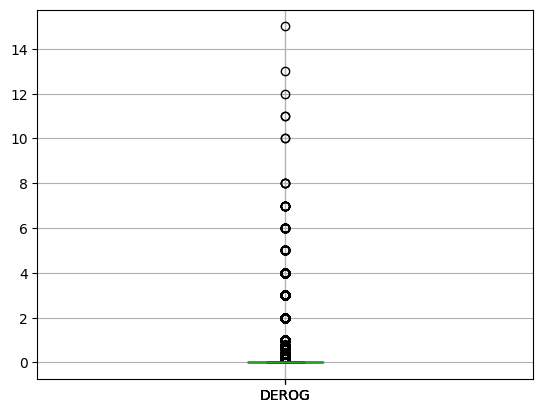

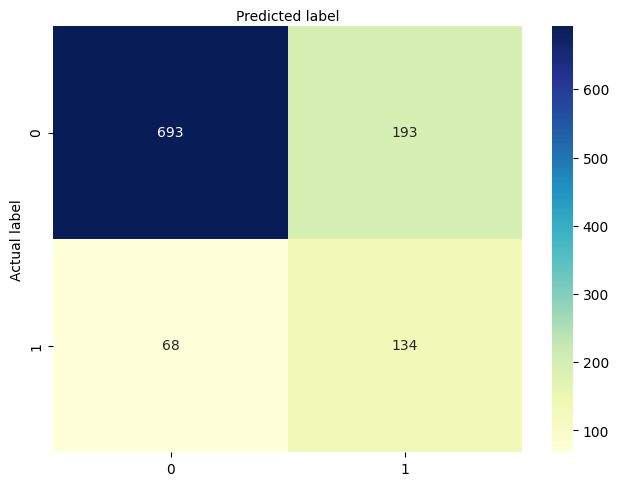

In [209]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cnfMatrix = confusion_matrix(y_test, predictions)
sns.heatmap(pd.DataFrame(cnfMatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()